## Gradient Descent Rule

權重更新 - <a href="img/s-3.png" target="_blank">圖例</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class AdalineGD(object):
    
    def __init__(self, alpha=0.01, epochs=50):
        self.alpha = alpha
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.alpha * X.T.dot(errors)
            self.w_[0] += self.alpha * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
            return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [3]:
df = pd.read_csv('../iris.data', header=None)

In [4]:
# 前 100項 - setosa and versicolor 
# labeling setosa(-1) versicolor(1) 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

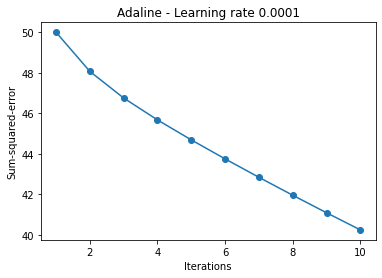

In [5]:
ada = AdalineGD(epochs=10, alpha=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()